# NetworkX-Tutorial

https://networkx.org/documentation/latest/_downloads/networkx_reference.pdf



## Create an empty graph

In [1]:
import networkx as nx
G = nx.Graph()


## Nodes

single nodes

In [2]:
G. add_node(1)

nodes from iterable container, such as list or tuple

In [3]:
G.add_nodes_from([2,3])

from a list of tuple with attributes in a dict

In [4]:
G.add_nodes_from([
    (4,{'color':'red'}),
    (5,{'color':'green'}),
])

### Zeichnen eines Graphen mit NetworkX

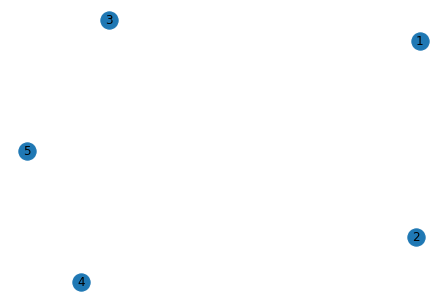

In [5]:
nx.draw(G, with_labels = True)

nodes from other graphs

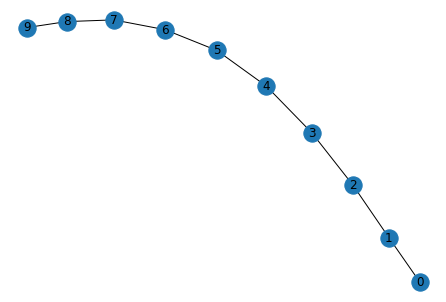

In [6]:
H = nx.path_graph(10)
nx.draw(H, with_labels = True) # repeat the execution --> what happens?

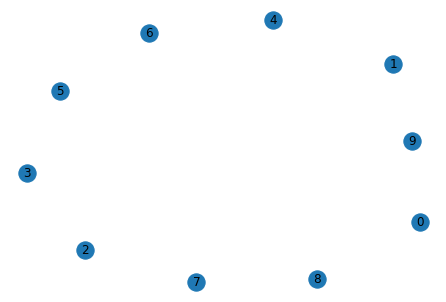

In [7]:
G.add_nodes_from(H)
nx.draw(G, with_labels = True)

## Edges

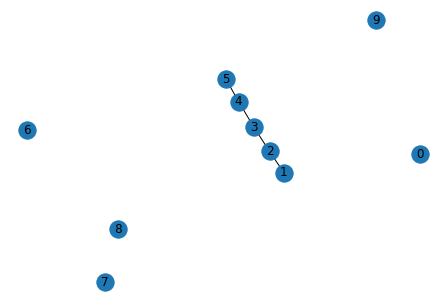

In [8]:
G.add_edge(1,2)
# or from unpack edge tuple
e = (2,3)
G.add_edge(*e)
# or by adding a list of edges
G.add_edges_from([(3,4),(4,5)])
nx.draw(G, with_labels = True)

### delete all edges and nodes

In [9]:
G.clear()

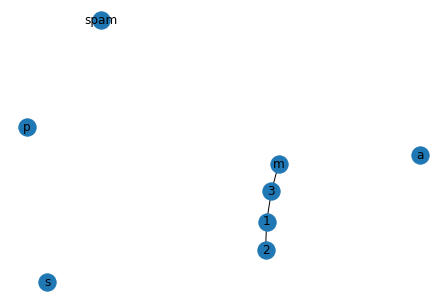

In [10]:
G.add_edges_from([(1,2),(1,3)])
G.add_node(1)
G.add_edge(1,2)
G.add_node('spam')
G.add_nodes_from('spam')
G.add_edge(3,'m')
nx.draw(G, with_labels = True)

Determine the number of edges and nodes

In [11]:
print('nodes: {}, edges: {}'.format(G.number_of_nodes(),G.number_of_edges()))

nodes: 8, edges: 3


### The order of adjacency reporting

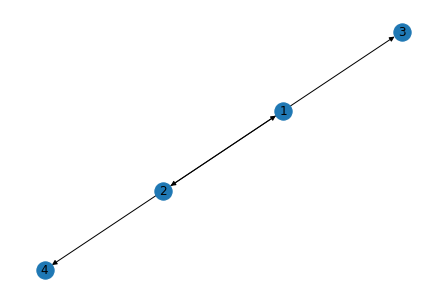

In [12]:
Gd=nx.DiGraph()
Gd.add_edge(2,1)# adds the nodes in order 2, 1
Gd.add_edge(1,3)
Gd.add_edge(2,4)
Gd.add_edge(1,2)
# 
assert list(Gd.successors(2))==[1,4]
assert list(Gd.edges)==[(2,1), (2,4), (1,3), (1,2)]
# 'assert condition' checks if there is an assertions error
# assert - behaupten
# adjacent - angrenzend
# successors - Nachfolger
# predecessor - Vorgänger
nx.draw(Gd, with_labels = True)

### Examining elements of a graph

In [13]:
list(Gd.nodes)

[2, 1, 3, 4]

In [14]:
list(Gd.edges)

[(2, 1), (2, 4), (1, 3), (1, 2)]

In [15]:
list(Gd.adj[1]) # checks the neighbors(1)

[3, 2]

In [16]:
Gd.edges([1,2]) # checks the edges of nodes

OutEdgeDataView([(1, 3), (1, 2), (2, 1), (2, 4)])

In [17]:
Gd.degree([2,3]) # checks the number of edges of nodes

DiDegreeView({2: 3, 3: 1})

### Remove elements from graph

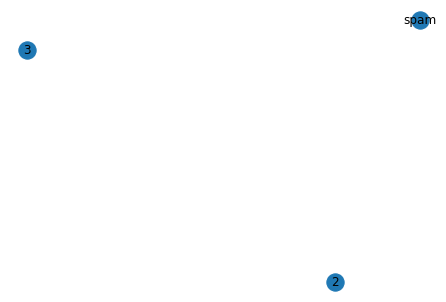

In [18]:
G.remove_node(1)
G.remove_nodes_from('spam')
#list(G.nodes)
nx.draw(G, with_labels = True)

In [19]:
# G.remove_edge(2,3) would be possible if there would be an edge(2,3)

## Create a graph fron another (using graph constructor)

In [20]:
G.add_edge(1,2)

In [21]:
H = nx.DiGraph(G)
list(H.edges())

[(2, 1), (1, 2)]

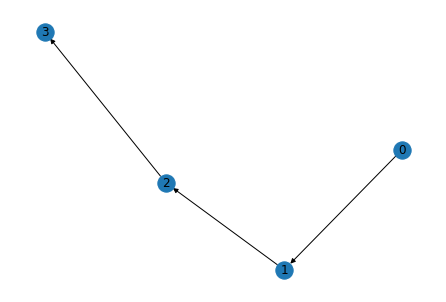

In [22]:
edgeList = [(0,1),(1,2),(2,3)]
H = nx.DiGraph(edgeList)
nx.draw(H, with_labels = True)

### Accessing edges and neighbors

In [23]:
G = nx.Graph([(1,2,{"color": "yellow"})])
G[1]# same as G.adj[1]
#nx.draw(G, with_labels = True)

AtlasView({2: {'color': 'yellow'}})

In [24]:
G[1][2]

{'color': 'yellow'}

In [25]:
G.add_edge(1,3)
G[1][3]['color']="blue"
G.edges[1,2]['color']="red"
G.edges[1,2]

{'color': 'red'}

Fast examination of all (node, adjacency) pairs is achieved usingG.adjacency(), orG.adj.items(). Note thatfor undirected graphs, adjacency iteration sees each edge twice.

### Search for weights of the edges

In [26]:
FG=nx.Graph()
FG.add_weighted_edges_from([(1,2,0.125), (1,3,0.75), (2,4,1.2), (3,4,0.375)])
for n, nbrs in FG.adj.items():
    for nbr, attr in nbrs.items():
        wt = attr['weight']
        if wt < 0.5:print(f"({n},{nbr},{wt:.3})")
#nx.draw(FG, with_labels = True)

(1,2,0.125)
(2,1,0.125)
(3,4,0.375)
(4,3,0.375)


In [27]:
FG.adj.items()

ItemsView(AdjacencyView({1: {2: {'weight': 0.125}, 3: {'weight': 0.75}}, 2: {1: {'weight': 0.125}, 4: {'weight': 1.2}}, 3: {1: {'weight': 0.75}, 4: {'weight': 0.375}}, 4: {2: {'weight': 1.2}, 3: {'weight': 0.375}}}))

**now faster**

In [28]:
for nx.draw(FG, with_labels = True)(u, v, wt) in FG.edges.data('weight'):
    if wt > 0.5: print(f"({u},{v},{wt:.3})")

SyntaxError: cannot assign to function call (<ipython-input-28-92dc760e16e9>, line 1)

## Adding attributes

### Graph attributes

In [ ]:
G = nx.Graph(Day = "Friday") # create an attribute
G.graph

In [ ]:
# and modify it
G.graph['Day'] = 'Monday' # all attribute names are strings!
G.graph

### Node attributes

In [ ]:
G.clear()
G.add_node(1, time = '5pm')
G.add_nodes_from([3], time = '2pm') # [3] is a list with one element
G.nodes[1]
#nx.draw(G, with_labels = True)

In [ ]:
G.nodes[1]['room'] = 714 # get an attribute 'room' --> node 1 has 2 attributes

In [ ]:
G.nodes.data()

### Edge attributes

In [ ]:
G.add_edge(1,2, weight = 4.7)
G.add_edges_from([(3,4), (4,5)], color = 'red')
G.add_edges_from([(1,2, {'color':'blue'}), (2,3, {'weight':8})])
G[1][2]['weight'] = 4.7
G.edges[3,4]['weight'] = 4.2

## Directed Graphs

In [ ]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1,2,0.5), (3,1,0.75)])
DG.out_degree(1, weight='weight') 
#nx.draw(DG, with_labels = True)

In [ ]:
#DG.out_degree?

In [ ]:
DG.degree(1, weight = 'weight')

In [ ]:
list(DG.successors(1))

# Drawing

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
G = nx.petersen_graph()
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
plt.show()

In [ ]:
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
    }
plt.subplot(221)

nx.draw_random(G, **options)
plt.subplot(222)

nx.draw_circular(G, **options)
plt.subplot(223)

nx.draw_spectral(G, **options)
plt.subplot(224)

nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)

In [ ]:
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12,13]]
nx.draw_shell(G, nlist=shells, **options)

In [ ]:
nx.draw(G)
plt.savefig("path.png")

In [ ]:
# conda install -c alubbock pygraphviz --> geht aber nicht :(

from networkx.drawing.nx_pydot import write_dot

pos = nx.nx_agraph.graphviz_layout(G)
#nx.draw(G, pos=pos)
#write_dot(G, 'file.dot')

https://coderzcolumn.com/tutorials/data-science/network-analysis-in-python-node-importance-and-paths-networkx